In [2]:
import pandas as pd
import seaborn as sns

vax_df = pd.read_csv("datasets/dados_vacinacao.csv")
vax_df.head(5)

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_nmMunicipio,paciente_endereco_cep,estabelecimento_municipio_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo
0,49,1972-04-06,M,99,SEM INFORMACAO,CABEDELO,58101,CABEDELO,1.0,Comorbidades,2021-12-21,Reforço,87
1,43,1978-01-16,F,99,SEM INFORMACAO,CABEDELO,58101,CABEDELO,1.0,Comorbidades,2021-05-10,1ª Dose,85
2,68,1953-03-13,F,2,PRETA,SOUSA,58805,SOUSA,2.0,Faixa Etária,2021-03-23,1ª Dose,86
3,23,1998-10-06,F,1,BRANCA,CAJAZEIRAS,58900,CACHOEIRA DOS INDIOS,2.0,Faixa Etária,2022-03-24,Reforço,88
4,72,1949-03-10,M,4,AMARELA,VIEIROPOLIS,58822,VIEIROPOLIS,2.0,Faixa Etária,2021-12-06,Reforço,87


In [3]:
vax_df.value_counts('vacina_codigo')

vacina_codigo
87    421567
85    292413
86    254651
88     41159
99     21899
89     16134
98       752
dtype: int64

como tem dois códigos diferentes para catalogar astrazenica (85 e 89), iremos eliminar um do dicionario e adicionar as ocorrencias do outro ao primeiro

In [4]:
vax_codigos_dict = {85: 'Astrazenica',
                    86: 'Coronavac',
                    87: 'Pfizer',
                    88: 'Jansen',
                    99: 'Pfizer pediátrica'}

codigos = pd.Series(vax_codigos_dict)

In [5]:
vax_aplicacoes_dict = {87: 421567,
                       85: 308547,
                       86: 254651,
                       88: 41159,
                       99: 21899}

aplicacoes = pd.Series(vax_aplicacoes_dict)

In [6]:
vax_aplicadas = pd.DataFrame({"vacina":codigos, "quantidade de doses aplicadas": aplicacoes})
vax_aplicadas

,vacina,quantidade de doses aplicadas
85,Astrazenica,308547
86,Coronavac,254651
87,Pfizer,421567
88,Jansen,41159
99,Pfizer pediátrica,21899


<AxesSubplot:xlabel='vacina', ylabel='quantidade de doses aplicadas'>

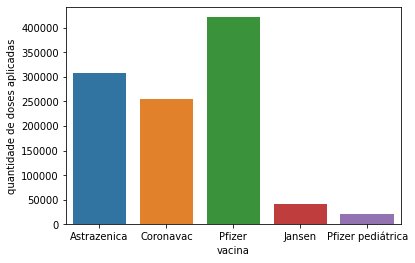

In [7]:
sns.barplot(data=vax_aplicadas, x='vacina', y='quantidade de doses aplicadas')

In [8]:
vax_df.value_counts('paciente_enumSexoBiologico')

paciente_enumSexoBiologico
F    563338
M    485231
I         6
dtype: int64